--------------
# <center>- TP n°5 : Support Vector Machine (SVM) -</center>
---------------
*Thomas Koch*

### <center>- Introduction et fondements mathématiques -</center>
Les SVM ont été introduites par Vapnik [3], et sont abordées au chapitre 12 du livre [1]. Des détails plus mathématiques peuvent être trouvés dans le chapitre 7 du livre [2]. La popularité des méthodes SVM, pour la classification binaire en particulier, provient du fait qu’elles reposent sur l’application d’algorithmes de recherche de règles de décision linéaires : on parle d’hyperplans (affine) séparateurs. Toutefois, cette recherche s’effectue dans un espace de caractères (*feature space*, en anglais) de très grande dimension qui
est l’image de l’espace d’entrée original par une transformation $Φ$ non linéaire.

Le but de ce TP est de mettre en pratique ce type de techniques de classification sur données réelles et simulées au moyen du package `scikit-learn` (lequel met en œuvre la librairie en C `libsvm`) et d’apprendre à contrôler les paramètres garantissant leur flexibilité (hyper-paramètres, noyau).

### <center>- Mise en œuvre -</center>
On utilisera l’objet sklearn.svm.SVC :
```python
from sklearn.svm import SVC
```
Faites une expérience avec les données `iris` comme suggéré ci-dessous.

### Question 1 : Classifier maison sur dataset `iris`
En vous basant sur la documentation à l’adresse suivante :
http://scikit-learn.org/stable/modules/svm.html 
écrivez un code qui va classifier la classe 1 contre la classe 2 du dataset `iris` en utilisant les deux premières variables et un noyau linéaire. En laissant la moitié des données de côté, évaluez la
performance en généralisation du modèle. Le dataset `iris` s’obtient avec les lignes suivantes :
```python
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris = datasets.load_iris()
X = iris.data
X = scaler.fit_transform(X)
y = iris.target
X = X[y != 0, :2]
y = y[y != 0]
```

>On pourra également se repporter aux liens suivants :
* http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html
* https://fr.wikipedia.org/wiki/Iris_%28jeu_de_donn%C3%A9es%29

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

from svmsource import *  #import des fonctions du fichier svmsource.py
#import svmsource as sv #autre possibilité pour l'import

In [2]:
scaler = StandardScaler()

iris = datasets.load_iris()

X = iris.data
X = scaler.fit_transform(X)

y = iris.target # 3 classes : Setosa, Versicolour and Virginica

X = X[y != 0, :2] # On retire la classe 0
y = y[y != 0] # On retire la classe 0

In [3]:
X.shape

(100, 2)

In [4]:
y.shape

(100,)

Text(0.5, 1.0, 'iris dataset')

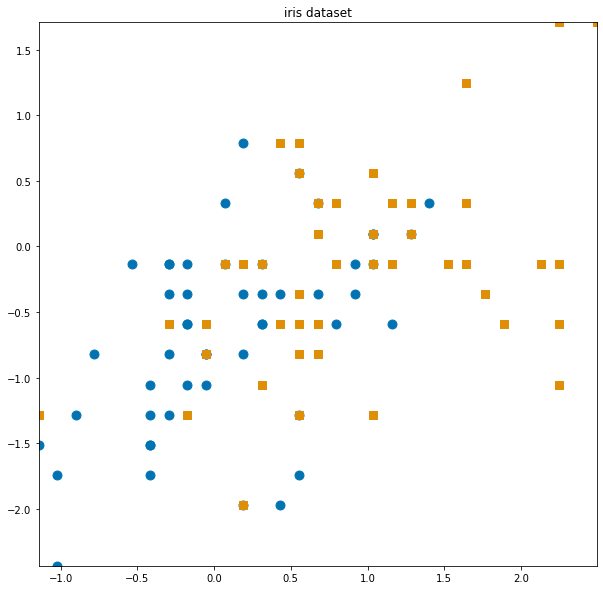

In [5]:
plt.figure(figsize=(10, 10))
plot_2d(X, y)
plt.title("iris dataset")

Score = 0.7


<Figure size 432x288 with 0 Axes>

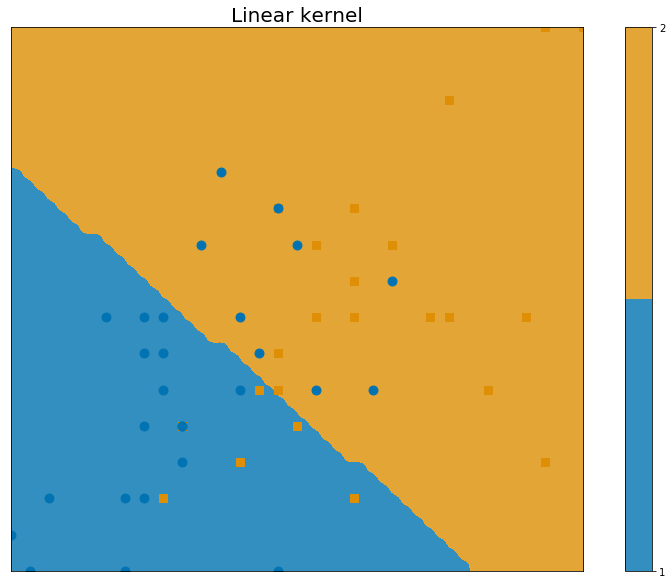

In [6]:
# Split train & test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)


svc_lin = SVC(kernel='linear')
# fit the model
svc_lin.fit(X_train, y_train)

# predict labels
y_pred_lin = svc_lin.predict(X_test)

# check your score
score_lin = svc_lin.score(X_test, y_test)
print('Score = %s' % score_lin)

# display your results using plot_2d and frontiere
plt.figure(2)
plt.figure(figsize=(15,10))
plt.title("Linear kernel", size=20)
frontiere(svc_lin.predict, X_test, y_test)

### Question 2 : Comparaison avec noyau polynomial
Comparez le résultat avec un SVM basé sur noyau polynomial.

Score = 0.58


<Figure size 432x288 with 0 Axes>

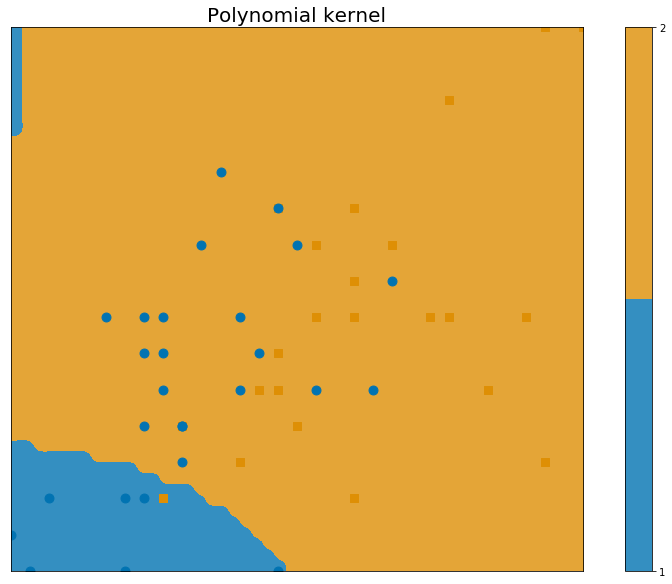

In [7]:
svc_poly = SVC(kernel='poly', gamma='scale')
# fit the model
svc_poly.fit(X_train, y_train)

# predict labels
y_pred_poly = svc_poly.predict(X_test)

# check your score
score_poly = svc_poly.score(X_test, y_test)
print('Score = %s' % score_poly)

# display your results using plot_2d and frontiere
plt.figure(2)
plt.figure(figsize=(15,10))
plt.title("Polynomial kernel", size=20)
frontiere(svc_poly.predict, X_test, y_test)

>Globalement le noyau polynomial nous donne de moins bons résultats.

### SVM GUI
* Lancez le script svm_gui.py disponible à l’adresse : http://scikit-learn.org/stable/auto_examples/applications/svm_gui.html Cette application permet en temps réel d’évaluer l’impact du choix du noyau et du paramètre de régularisation $C$.
* Générez un jeu de données très déséquilibré avec beaucoup plus de points dans une classe que dans l’autre (au moins 90% vs 10%).
* A l’aide d’un noyau linéaire et en diminuant le paramètre $C$ qu’observez vous ? Ce phénomène peut être corrigé en pratique en pondérant d’avantage les erreurs sur la classe la moins présente (paramètre `class_weight` de SVC) ou par une technique de re-calibration (utilisée avec `SVC(..., probability=True)`).

In [8]:
%run svm_gui.py

Module created for script run in IPython


>Globalement on observe que lorsque C diminue, la marge autour de la séparation augmente.

### Classification de visages
L’exemple suivant est un problème de classification de visages. La base de données à utiliser est disponible à l’adresse suivante : https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html. Vous pouvez choisir deux personnes, par exemple Tony Blair et Colin Powell, pour accélérer le calcul. Aussi, vous pouvez utilisez seulement grayscale (et non le couleur) pour réduire le nombre de variables.

In [28]:
"""
The dataset used in this example is a preprocessed excerpt
of the "Labeled Faces in the Wild", aka LFW_:

  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz (233MB)

  _LFW: http://vis-www.cs.umass.edu/lfw/

"""

from time import time
import pylab as pl

from sklearn.datasets import fetch_lfw_people


####################################################################
# Download the data (if not already on disk); load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4) # funneled=False, slice_=None, download_if_missing=True)

In [29]:
# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)


# #############################################################################
# Split into a training set and a test set using a stratified k fold

# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Total dataset size:
n_samples: 760
n_features: 1850
n_classes: 3


### Question 5 : Centrage et réduction des features
Utilisez les features centrées et réduites. (Pourquoi ?)

In [31]:
X_center = X - np.mean(X, axis=0)
X_scaled = X_center / np.std(X, axis=0)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

In [36]:
svc_poly = SVC(kernel='poly', gamma='scale')
# fit the model
svc_poly.fit(X_train, y_train)

# predict labels
y_pred_poly = svc_poly.predict(X_test)

# check your score
score_poly = svc_poly.score(X_test, y_test)
print(f'Le taux de réussite est de {round(100*score_poly,1)} %')

Le taux de réussite est égal 71.6 %


### Question 6 : Influence du paramètre de régularisation
Montrez l’influence du paramètre de régularisation. On pourra par exemple afficher l’erreur de prédiction en fonction de $C$ sur une échelle logarithmique entre $.10^5$ et $.10^{-5}$.